In [77]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Remove NA

In [78]:
uber_data = pd.read_csv('My Uber Drives - 2016.csv')
uber_data = uber_data.dropna()


# Convert in to Datetime Object

In [79]:
uber_data['START_DATE*'] = pd.to_datetime(uber_data['START_DATE*'], format = '%m/%d/%Y %H:%M')
uber_data['END_DATE*'] = pd.to_datetime(uber_data['END_DATE*'], format = '%m/%d/%Y %H:%M')

uber_data['HOUR'] = uber_data['START_DATE*'].dt.hour
uber_data['DAY'] = uber_data['START_DATE*'].dt.day
uber_data['MONTH'] = uber_data['START_DATE*'].dt.month
uber_data['WEEKDAY'] = uber_data['START_DATE*'].dt.day_name()
uber_data['DAY_OF_WEEK'] = uber_data['START_DATE*'].dt.dayofweek
uber_data['TRIP'] = uber_data['START*'] + '-' + uber_data['STOP*']

uber_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK,TRIP
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4,Fort Pierce-Fort Pierce
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5,Fort Pierce-Fort Pierce
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1,Fort Pierce-Fort Pierce
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2,Fort Pierce-West Palm Beach
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2,West Palm Beach-West Palm Beach
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,12,Saturday,5,Kar?chi-Kar?chi
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,12,Saturday,5,Kar?chi-Unknown Location
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,12,Saturday,5,Unknown Location-Unknown Location
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,12,Saturday,5,Katunayake-Gampaha


# Category Plot

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

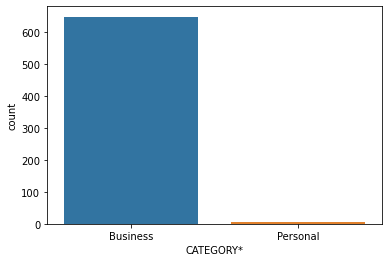

In [80]:
sns.countplot(x = uber_data['CATEGORY*'])

# Purpuse Plot

<AxesSubplot:xlabel='count', ylabel='PURPOSE*'>

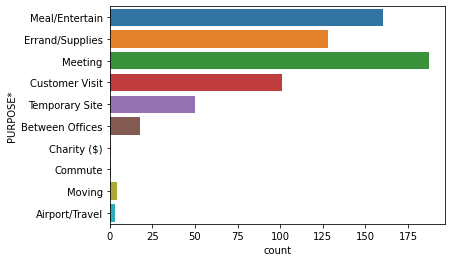

In [81]:
sns.countplot(y = uber_data['PURPOSE*'])

# Miles Plot

<AxesSubplot:ylabel='Frequency'>

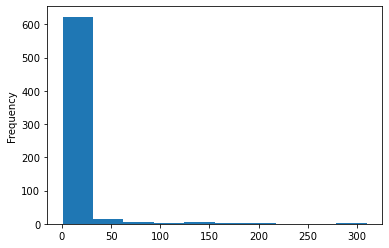

In [46]:
uber_data['MILES*'].plot.hist()

# The most Frequent Hour

Text(0.5, 1.0, 'Number of trips Vs hours')

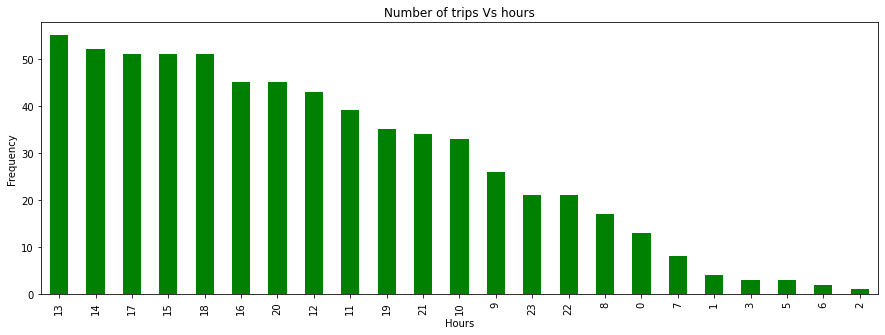

In [48]:
hours = uber_data['HOUR'].value_counts()
hours.plot(kind = 'bar', color = 'green', figsize = (15, 5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')

# The most Frequent Weekday

Text(0.5, 1.0, 'Number of trips Vs weekday')

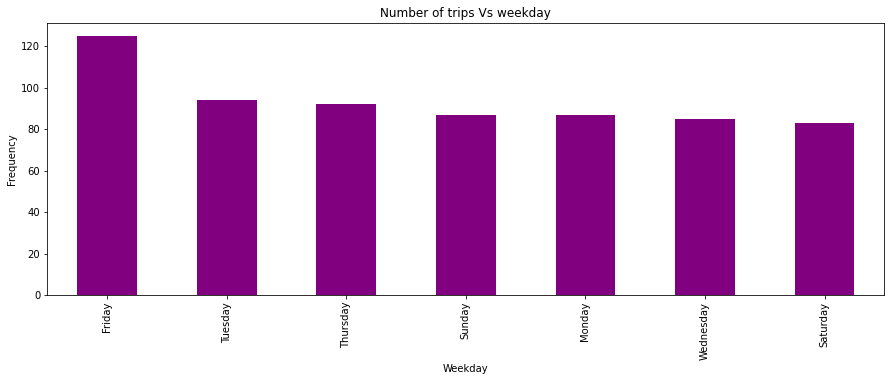

In [50]:
days = uber_data['WEEKDAY'].value_counts()
days.plot(kind = 'bar', color = 'purple', figsize = (15, 5))
plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.title('Number of trips Vs weekday')

# The most Frequent Month

Text(0.5, 1.0, 'Number of trips Vs months')

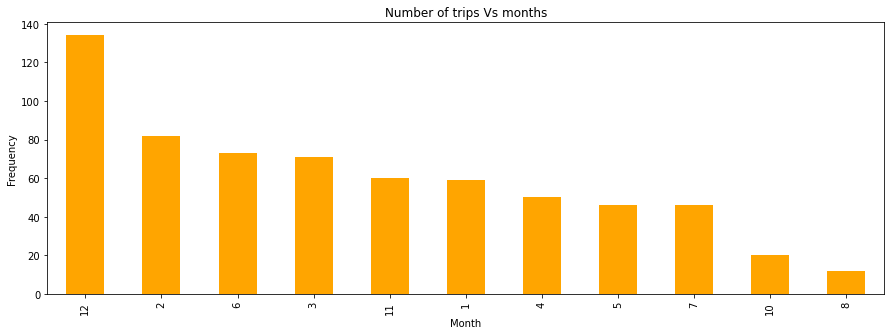

In [57]:
months = uber_data['MONTH'].value_counts()
months.plot(kind = 'bar',  color = 'orange', figsize = (15,5), )
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Number of trips Vs months')

# The most busy days in December

Text(0.5, 1.0, 'Number of trips Vs december')

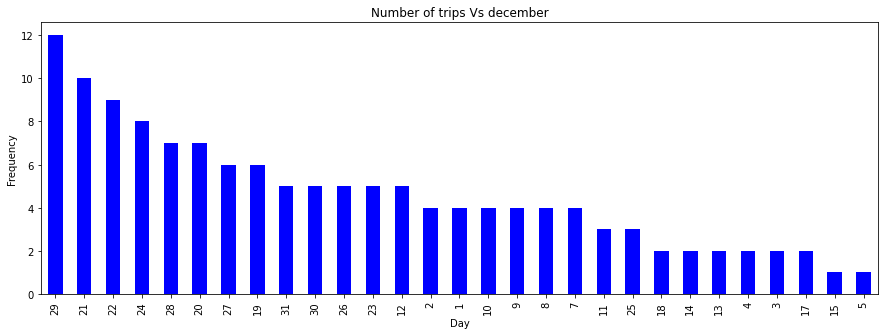

In [58]:
dec = uber_data["DAY"][uber_data['MONTH'] == 12].value_counts()
dec.plot(kind = 'bar',  color = 'blue', figsize = (15,5))
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Number of trips Vs december')

# The Most Traveled Place

Text(0.5, 1.0, 'Pickup Point Vs Frequency')

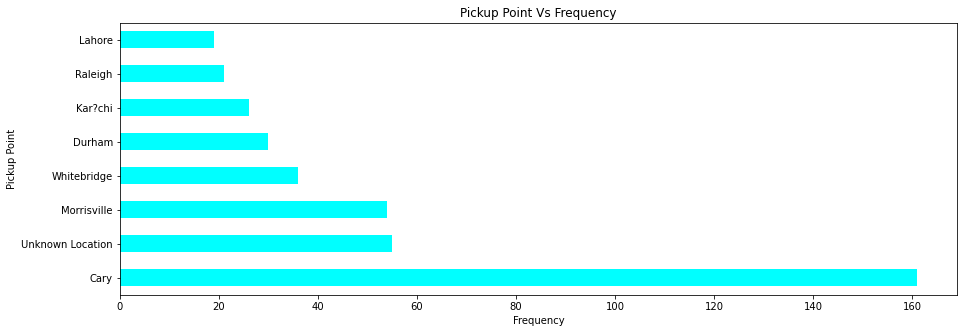

In [62]:
place = uber_data['START*'].value_counts().nlargest(8)
place.plot(kind = 'barh',  color = 'cyan', figsize = (15,5))
plt.xlabel('Frequency')
plt.ylabel('Pickup Point')
plt.title('Pickup Point Vs Frequency')

# The Most Frequent End Point

Text(0.5, 1.0, 'End Point Vs Frequency')

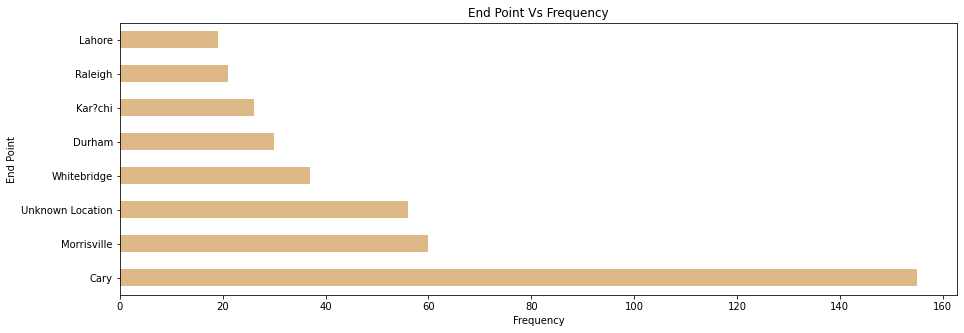

In [63]:
endpoint = uber_data['STOP*'].value_counts().nlargest(8)
endpoint.plot(kind = 'barh',  color = 'burlywood', figsize = (15,5))
plt.xlabel('Frequency')
plt.ylabel('End Point')
plt.title('End Point Vs Frequency')

# Trips Vs Frequency

Text(0.5, 1.0, 'End Point Vs Frequency')

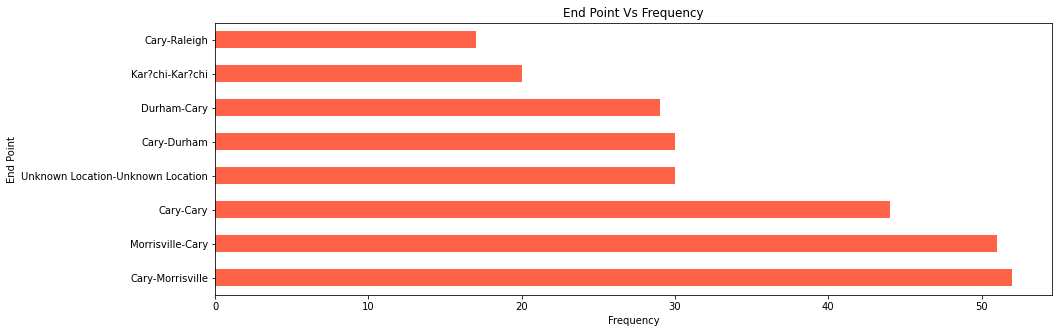

In [82]:
trip = uber_data['TRIP'].value_counts().nlargest(8)
trip.plot(kind = 'barh',  color = 'tomato', figsize = (15,5))
plt.xlabel('Frequency')
plt.ylabel('End Point')
plt.title('End Point Vs Frequency')